<a href="https://colab.research.google.com/github/nishithkumar11/Analysis/blob/master/AirBnB_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries to be used further
import pandas as pd
import seaborn as sb

In [0]:
#Importing the data from google drive post authentication
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Loading the data from CSV to dataframe
path = "/content/drive/My Drive/Data/tomslee_airbnb_nyc_train.csv"
data_frm = pd.read_csv(path,engine="python",encoding='utf-8')

In [70]:
#Getting number of coulmns and rows
data_frm.shape

(882000, 14)

In [71]:
 #
 data_frm.head(10)

,room_id,host_id,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified,overall_satisfaction
0,105,500.0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5/12/17 8:56 AM,5.0
1,2515,2758.0,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,5/12/17 6:11 PM,4.5
2,2993,3352.0,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,5/12/17 3:16 PM,NaN
3,3046,2758.0,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,5/12/17 7:47 PM,4.5
4,3101,2758.0,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,5/12/17 12:57 AM,4.5
5,3102,2758.0,Private room,Manhattan,Harlem,23.0,4.0,1.0,212.0,2.0,40.814100,-73.945891,5/12/17 1:03 AM,5.0
6,3153,3690.0,Private room,Queens,Astoria,33.0,2.0,1.0,112.0,1.0,40.759736,-73.906151,5/12/17 5:13 AM,5.0
7,3687,4647.0,Entire home/apt,Brooklyn,Bedford-Stuyvesant,43.0,3.0,NaN,100.0,7.0,40.678300,-73.944627,5/12/17 8:45 AM,4.5
8,3831,4869.0,Private room,Brooklyn,Clinton Hill,0.0,3.0,1.0,112.0,1.0,40.685138,-73.959757,5/12/17 9:15 PM,NaN
9,4573,5871.0,Entire home/apt,Brooklyn,Crown Heights,3.0,6.0,2.0,202.0,3.0,40.674376,-73.933990,5/12/17 7:01 PM,4.0


In [72]:
#Checking for datatypes of columns
data_frm.dtypes

room_id                   int64
host_id                 float64
room_type                object
borough                  object
neighborhood             object
reviews                 float64
accommodates            float64
bedrooms                float64
price                   float64
minstay                 float64
latitude                float64
longitude               float64
last_modified            object
overall_satisfaction    float64
dtype: object

In [73]:
#Checking the total NULL values for each column
data_frm.isnull().sum()

room_id                      0
host_id                    280
room_type                  318
borough                      0
neighborhood                 0
reviews                   5721
accommodates             37492
bedrooms                 53195
price                        0
minstay                 167337
latitude                     0
longitude                    0
last_modified                0
overall_satisfaction    250359
dtype: int64

In [0]:
#Removing records with NULL valaues and storing in separate dataframe
df_clean=data_frm.dropna(axis=0,how='any')
data_frm.to_csv('AirBnB_CleanData')


In [75]:
df_clean.isnull().sum()

room_id                 0
host_id                 0
room_type               0
borough                 0
neighborhood            0
reviews                 0
accommodates            0
bedrooms                0
price                   0
minstay                 0
latitude                0
longitude               0
last_modified           0
overall_satisfaction    0
dtype: int64

In [76]:
df_clean.shape

(417928, 14)

In [0]:
df_clean[['reviews','accommodates','bedrooms','price','minstay','overall_satisfaction']].describe()

,reviews,accommodates,bedrooms,price,minstay,overall_satisfaction
count,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000
mean,18.448053,2.773210,1.084802,151.705002,3.950743,4.647200
std,26.242731,1.545152,0.589844,175.574107,687.531193,0.429778
min,0.000000,1.000000,0.000000,10.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000,80.000000,1.000000,4.500000
50%,8.000000,2.000000,1.000000,121.000000,2.000000,4.500000
75%,22.000000,4.000000,1.000000,185.000000,3.000000,5.000000
max,366.000000,16.000000,10.000000,15000.000000,444443.000000,5.000000


In [0]:
df_clean.corr(method='pearson',min_periods=1)

,room_id,host_id,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
room_id,1.000000,0.662910,-0.319680,-0.018116,-0.052213,-0.097726,-0.001795,0.008432,0.087574,-0.015395
host_id,0.662910,1.000000,-0.189155,-0.002814,-0.032185,-0.073037,-0.001020,0.045435,0.112137,-0.047833
reviews,-0.319680,-0.189155,1.000000,0.050320,0.014847,-0.037890,-0.001408,0.012293,0.007784,-0.009176
accommodates,-0.018116,-0.002814,0.050320,1.000000,0.570979,0.315392,0.001073,-0.037800,-0.011435,-0.040630
bedrooms,-0.052213,-0.032185,0.014847,0.570979,1.000000,0.250163,0.002392,-0.078731,0.035018,-0.014006
price,-0.097726,-0.073037,-0.037890,0.315392,0.250163,1.000000,0.001146,0.034587,-0.199874,0.058781
minstay,-0.001795,-0.001020,-0.001408,0.001073,0.002392,0.001146,1.000000,-0.000951,0.001812,0.001309
latitude,0.008432,0.045435,0.012293,-0.037800,-0.078731,0.034587,-0.000951,1.000000,0.112828,-0.015933
longitude,0.087574,0.112137,0.007784,-0.011435,0.035018,-0.199874,0.001812,0.112828,1.000000,-0.053342
overall_satisfaction,-0.015395,-0.047833,-0.009176,-0.040630,-0.014006,0.058781,0.001309,-0.015933,-0.053342,1.000000


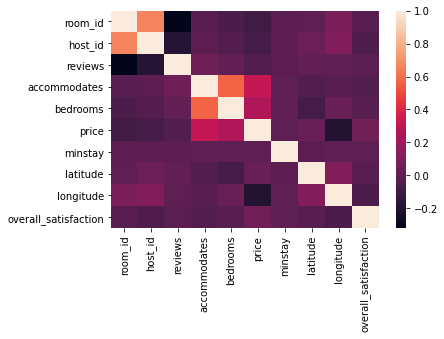

In [0]:
corr=df_clean.corr()
sb.heatmap(corr)